# lineplots()

**Line plots are generally used to:**
- Show trends over an ordered variable
- Visualize change over time or sequence
- Display aggregated behavior


* Best when x-axis has **order** (time, day, size, index)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


year → year (time component)

month → month (ordered categorical)

passengers → number of airline passengers

This is time series data

In [4]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


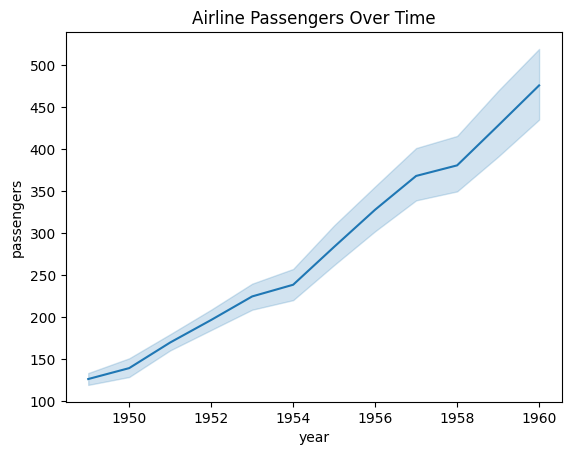

In [5]:
sns.lineplot( data=flights, 
              x="year", # category
              y="passengers"
)

plt.title("Airline Passengers Over Time")
plt.show()

# Observation:
- As year increases, the number of passenges also went up

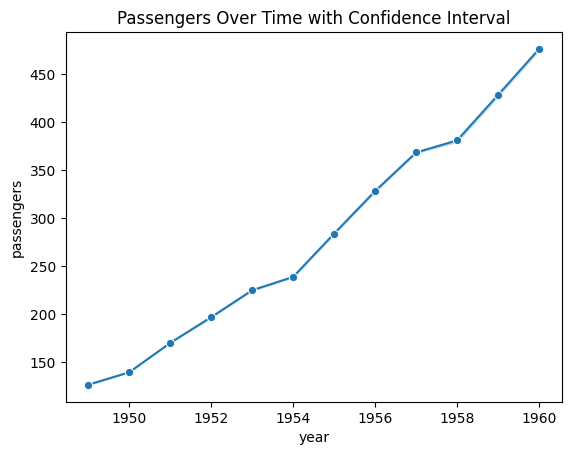

In [6]:
# with markers
sns.lineplot( data=flights, 
              x="year", # category
              y="passengers",
              errorbar=('ci', True),
              marker="o",
)

plt.title("Passengers Over Time with Confidence Interval")
plt.show()


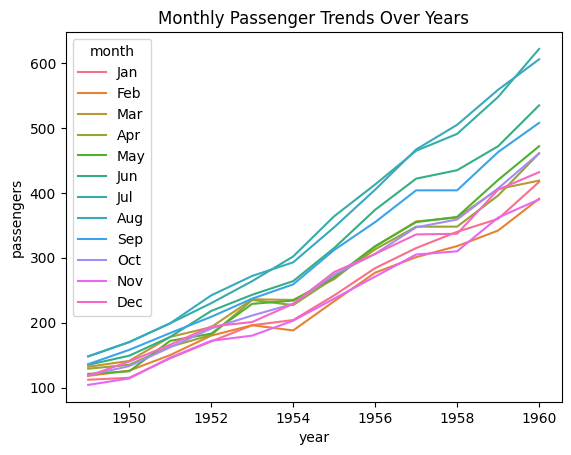

In [7]:
sns.lineplot(data=flights, 
             x="year", # category
             y="passengers",
             hue="month" # categorical
)

plt.title("Monthly Passenger Trends Over Years")
plt.show()

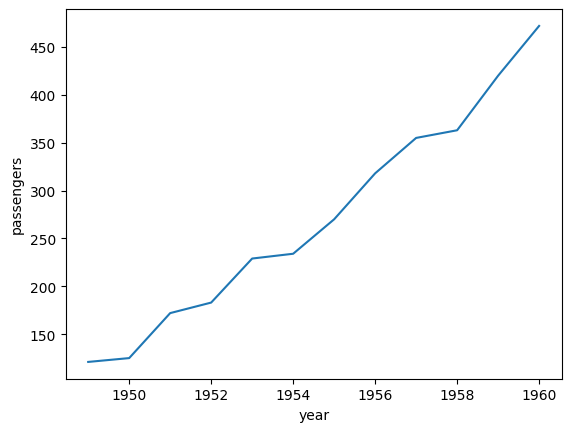

In [12]:
# lets look at May flights

may_flights = flights.query("month == 'May'")

sns.lineplot(data=may_flights, x="year", y="passengers")

plt.show()

# STOP

In [12]:
flights["month"].unique()

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [16]:
# Convert month to ordered category
import pandas as pd

month_order = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]

flights["month"] = pd.Categorical(
    flights["month"],
    categories=month_order,
    ordered=True
)

flights['month']

0      Jan
1      Feb
2      Mar
3      Apr
4      May
      ... 
139    Aug
140    Sep
141    Oct
142    Nov
143    Dec
Name: month, Length: 144, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

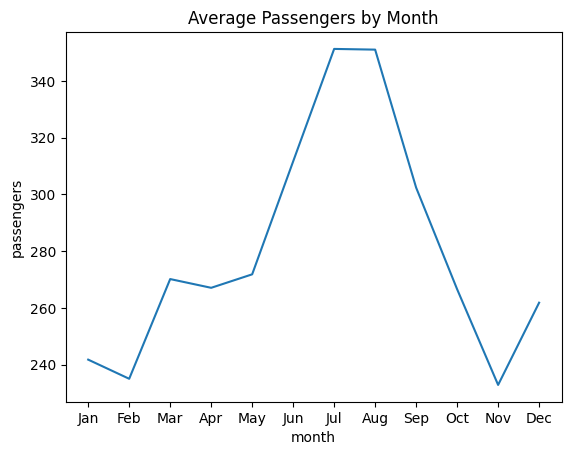

In [15]:
sns.lineplot(
    x="month",
    y="passengers",
    data=flights,
    errorbar=None
)
plt.title("Average Passengers by Month")
plt.show()